# Group Assignment 2: Data Preparation
#### Interactive-Visual Data Analysis, Fall 2024

### Group Eurotrash 
Max Zehnder (18-738-427), Marlon Gelpke (15-532-849), Mike Jason Frei (20-488-144), Hyeongseok Kim (23-741-903)

https://github.com/mikfre1/Eurotrash.git (currently private)

Team Contributions:
- Max
- Marlon
- Mike
- Hyeongseok

Tool Task List: (ensures matches with list provided by video)

A clear and complete characterization of your data, including:
- Information on each (relevant) attribute/feature’s data type and distribution of values (0.5 points)
- Information of each (relevant) attribute/feature’s data quality: amount of missing values, presence of extreme
values/outliers, consistency, validity (see L08 slides) (0.5 points)
- Information on your goals: what do you need to visualize and model with this data? What will it take to
prepare your data for those goals? (100-150 words) (1 point)


Clear and successful implementation of your data preparation goals, including:
- Visualizations to appropriately and clearly present the data wrangling progress and results (3 points)
- Visualizations to appropriately and clearly present the data modeling results, with a brief description of significant insights (100-150 words) (3 points)

A reflection on how well your your data wrangling and modeling decisions support your tasks, with discussion on
what you could refine to better support them (100-150 words) (1.5 points)


In [15]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


In [ ]:
# What Data do we need? 

# General Filtering is based on Years, then (Winner / Top 5 / Finalists / All Participants) and country

# Dominating Country: number of participation or winning?

# word Cloud: translate all lyrics to the same langauge?

# Yearly ranking of dominating Countries

# Countries in favor: Countries, votes and year

# Then for the details view we need Title, Country, SInger, Composer, Lyricist and ?Lyric? 

In [20]:
#Load Data
contestant_df = pd.read_csv('dataset/contestants.csv', encoding='ISO-8859-1')
vote_df = pd.read_csv('dataset/votes.csv')



In [22]:
contestant_df.to_csv('contestants_cleaned.csv', index=False)
vote_df.to_csv('votes_cleaned.csv', index=False)


Changes to dataset:
- Manually added the three missing songs


Remarks Dataset:
- Ties
- No Scoring


Missing data summary for Contestants Dataset:
points_jury_final    1553
points_tele_final    1553
points_jury_sf       1522
points_tele_sf       1522
running_sf           1129
points_sf            1129
place_sf             1129
sf_num               1094
lyricists             749
points_final          349
place_final           337
running_final         336
place_contest          56
composers              54
lyrics                 12
youtube_url            12
dtype: int64

Percentage of missing values in Contestants Dataset:
points_jury_final    89.561707
points_tele_final    89.561707
points_jury_sf       87.773933
points_tele_sf       87.773933
running_sf           65.109573
place_sf             65.109573
points_sf            65.109573
sf_num               63.091119
lyricists            43.194925
points_final         20.126874
place_final          19.434833
running_final        19.377163
place_contest         3.229527
composers             3.114187
lyrics                0.692042
youtu

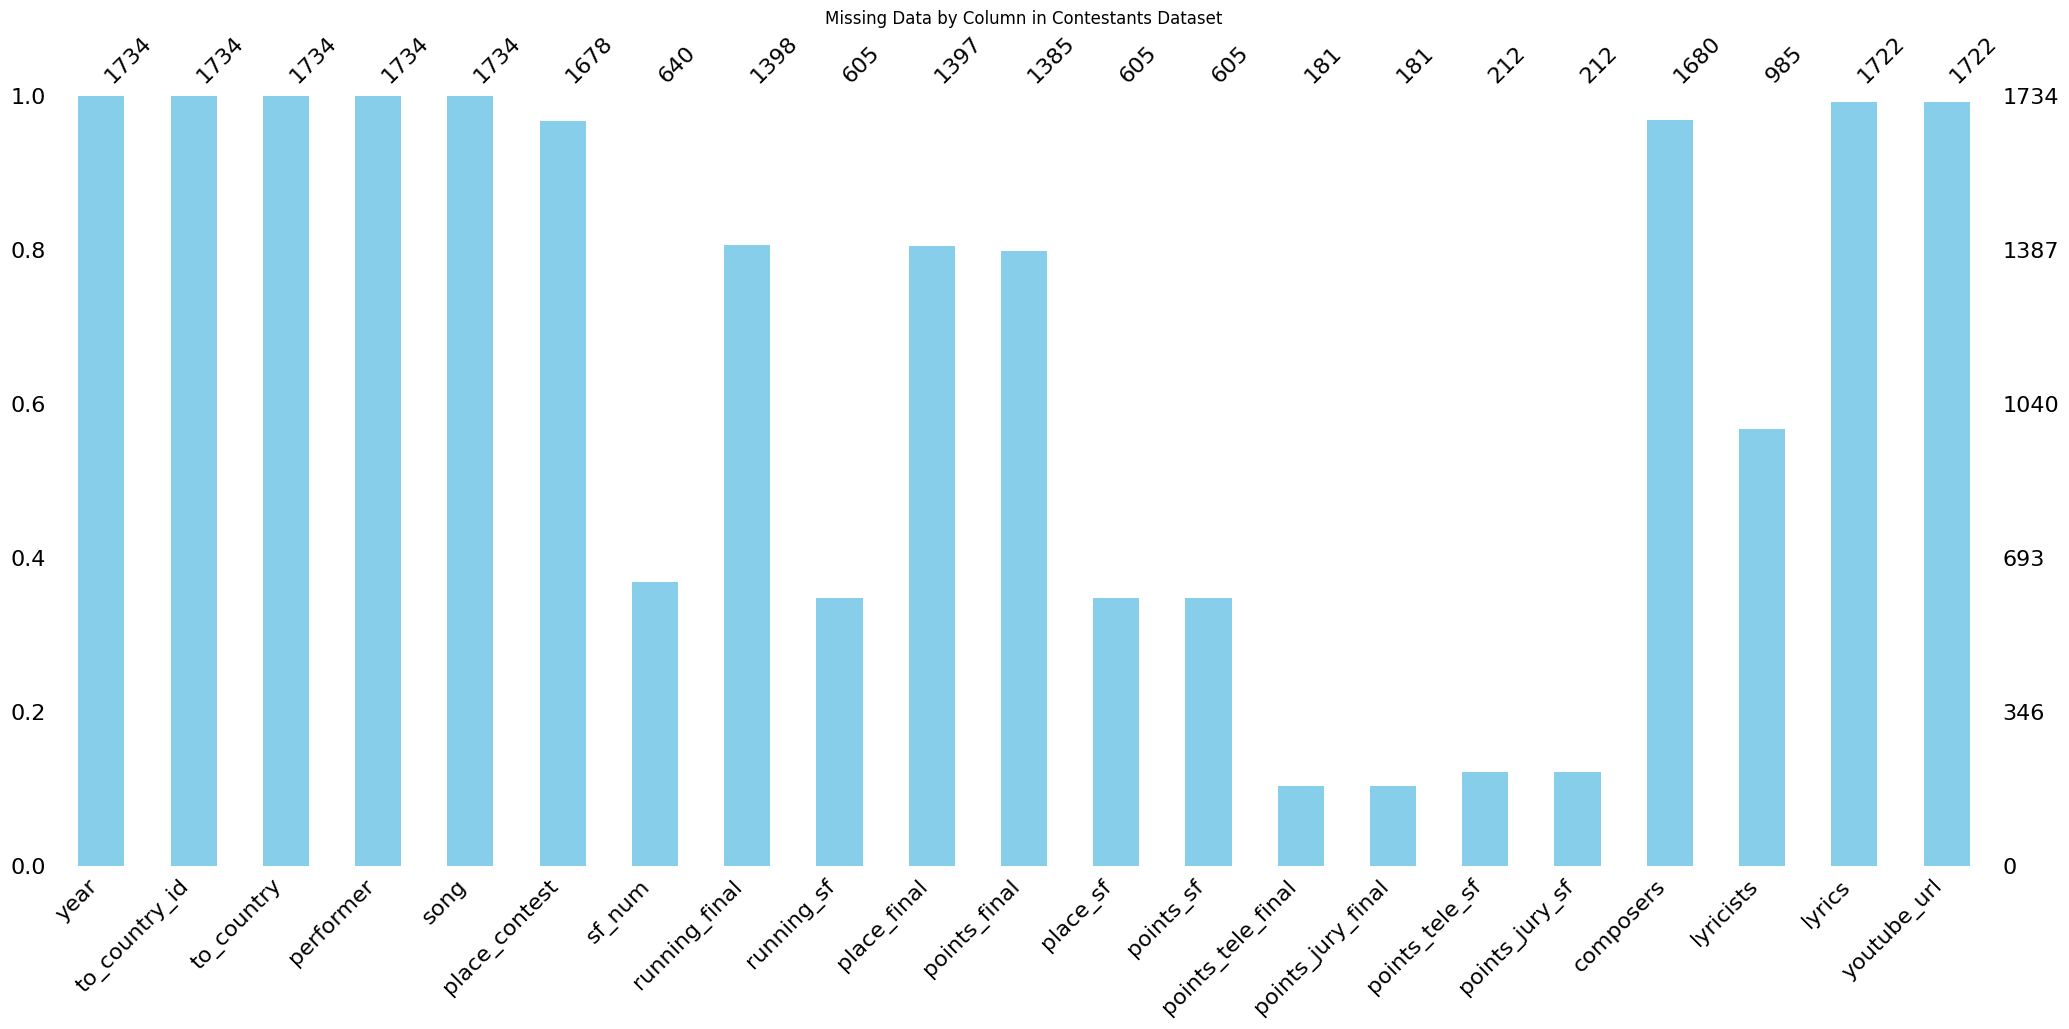

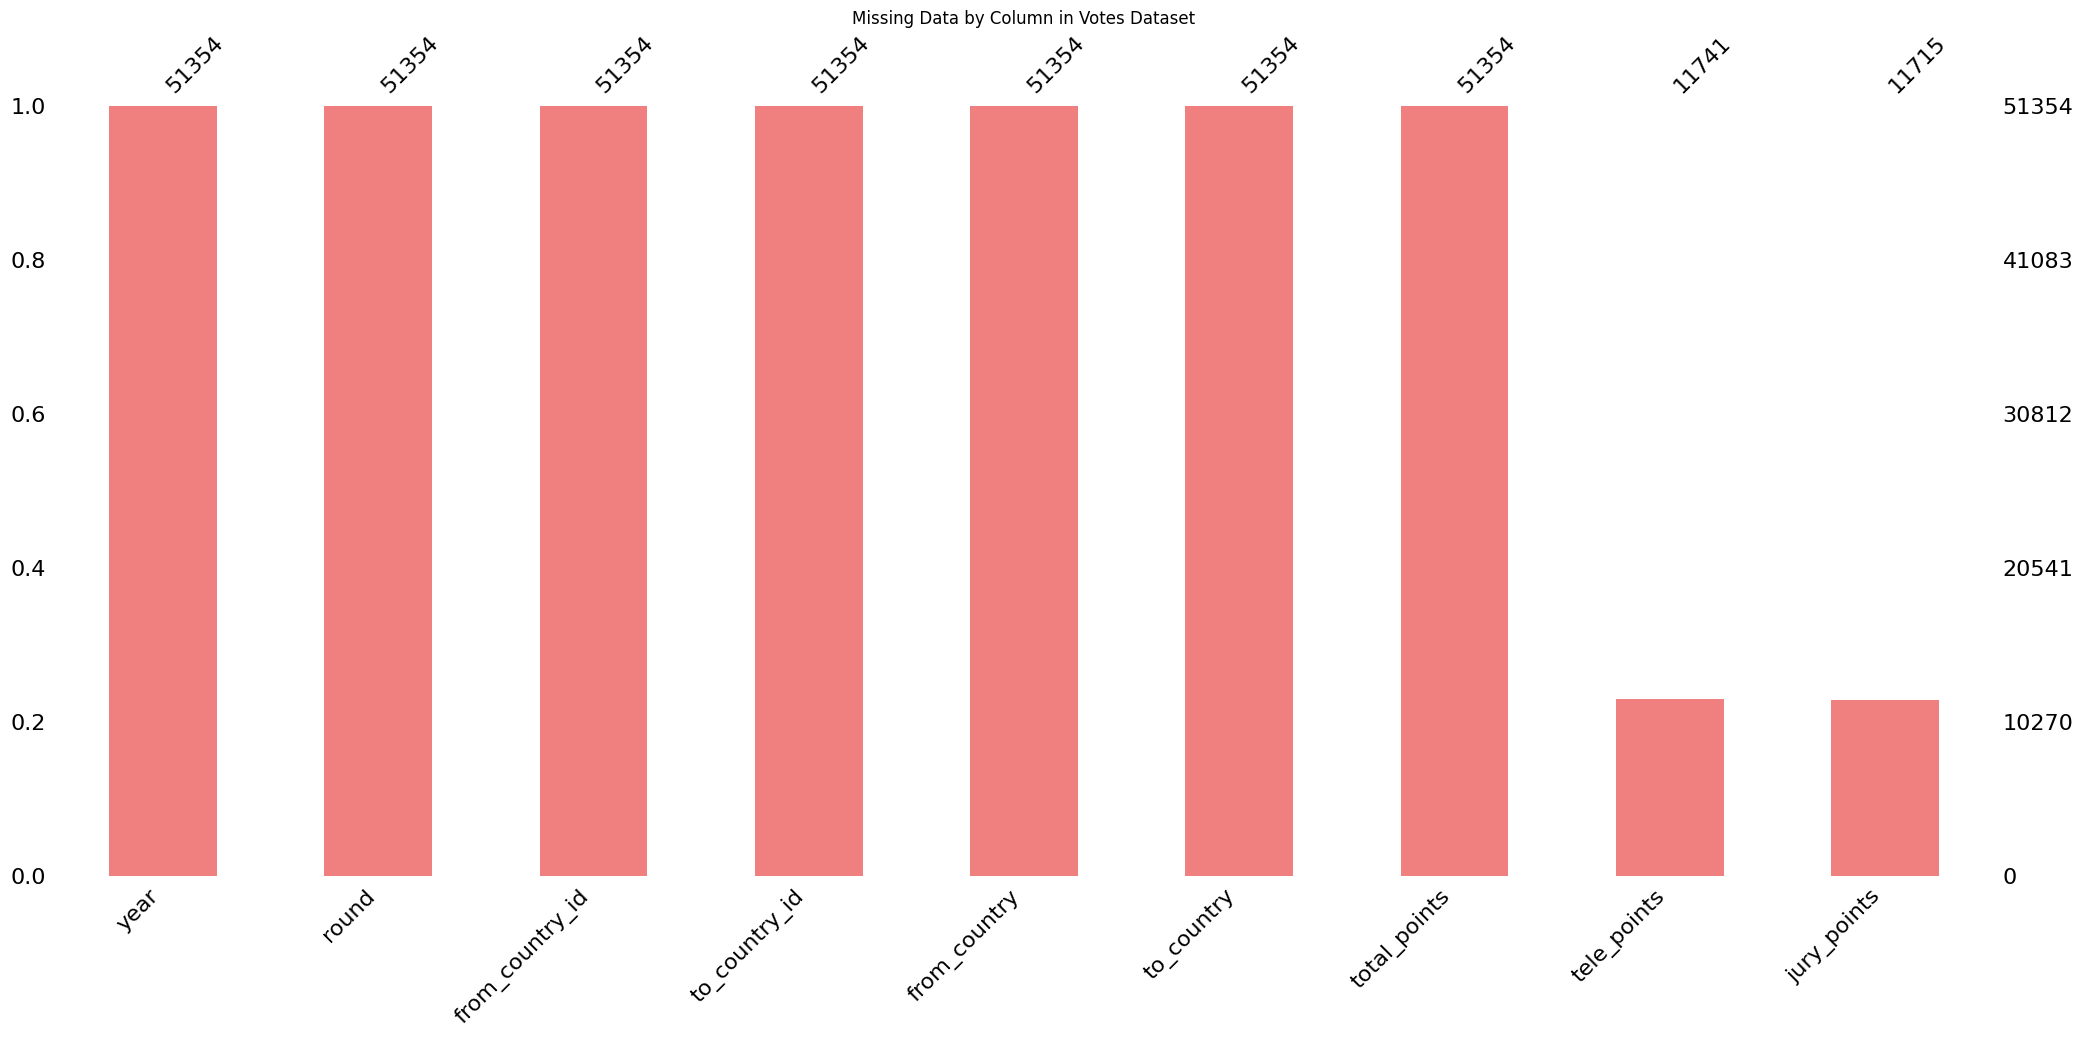

<Figure size 1000x600 with 0 Axes>

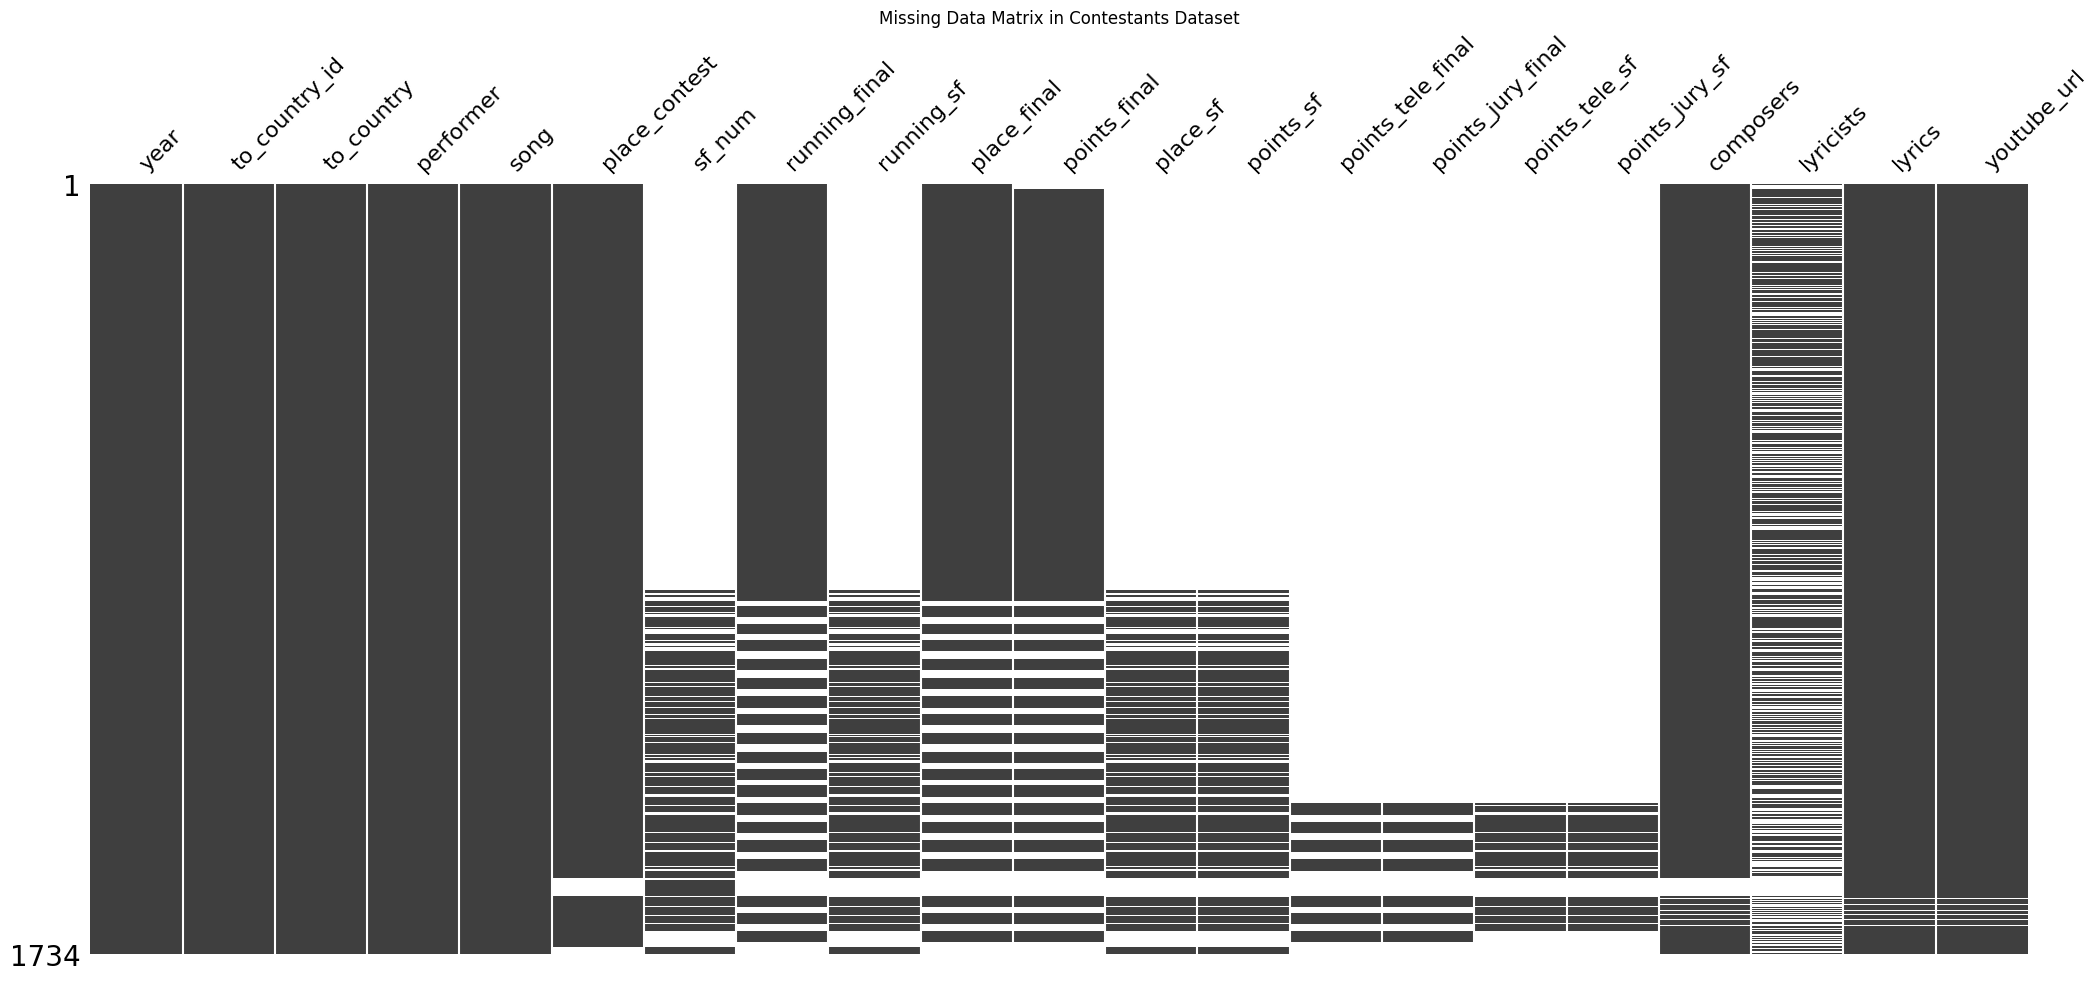

<Figure size 1000x600 with 0 Axes>

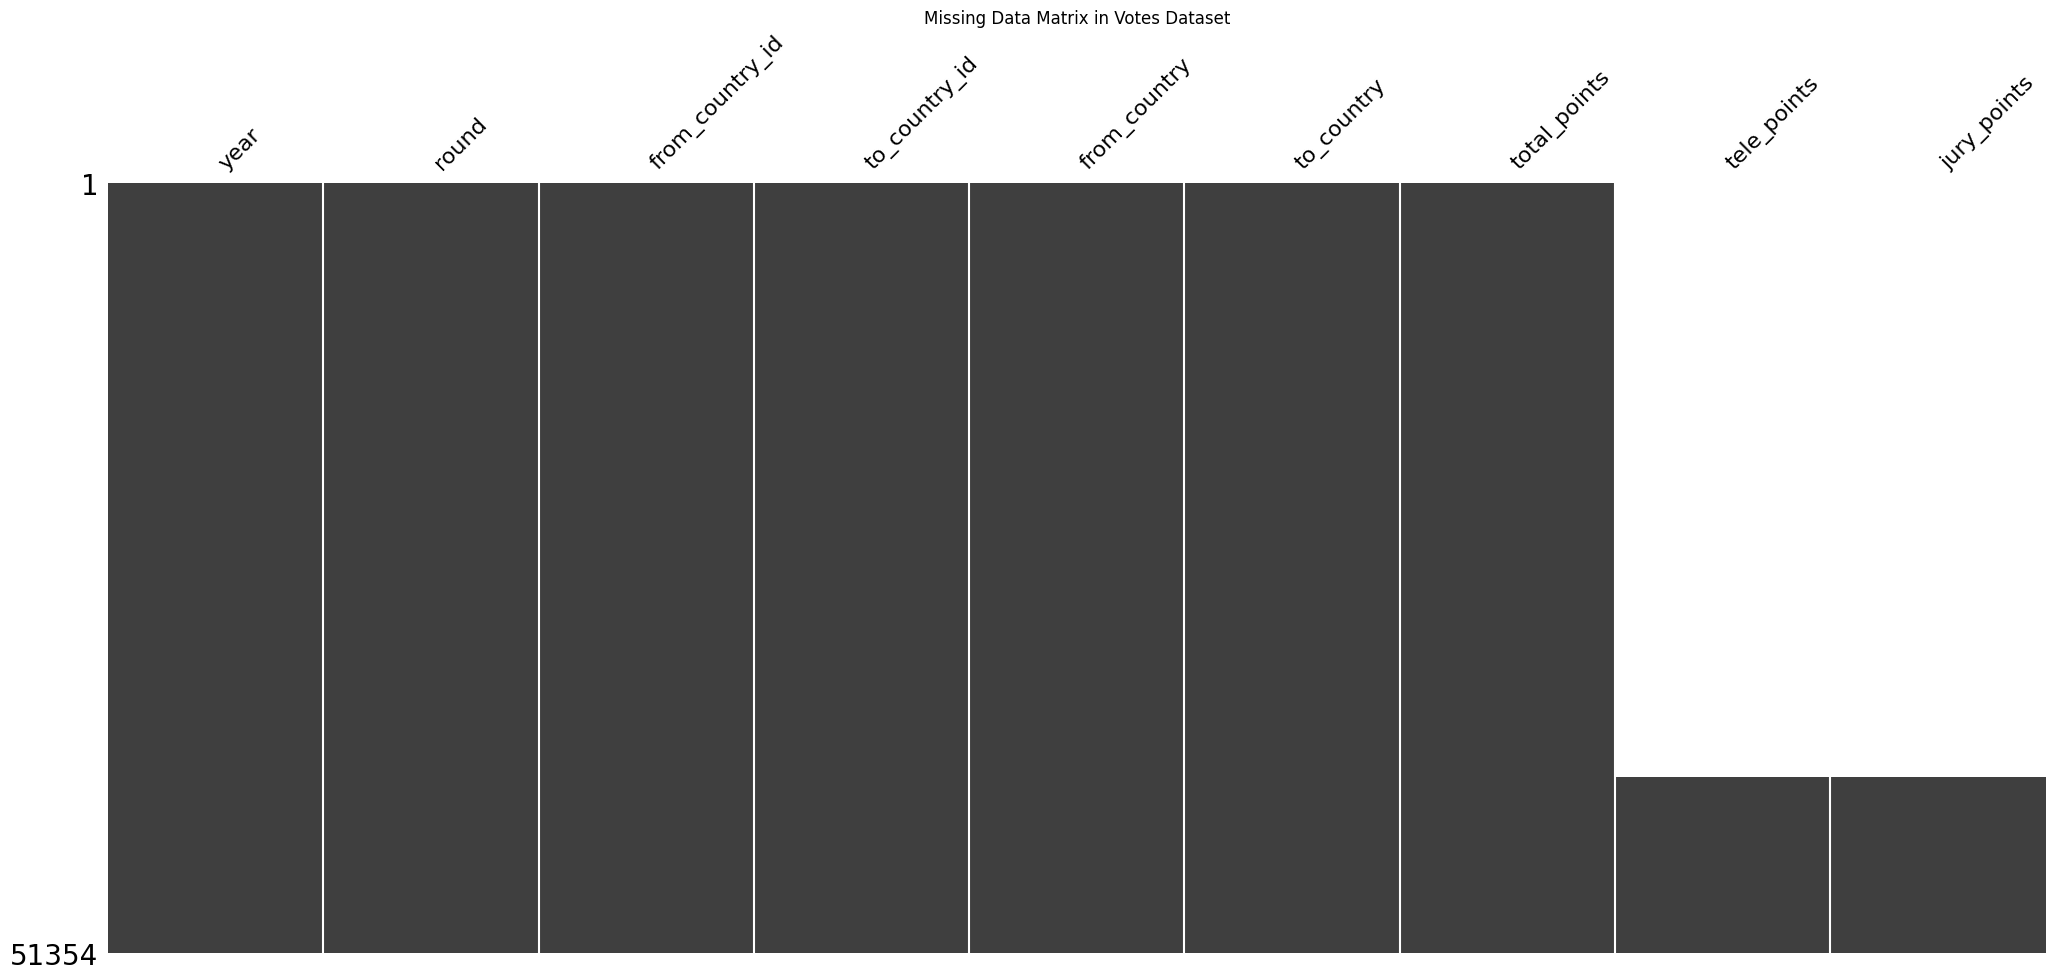

<Figure size 1000x600 with 0 Axes>

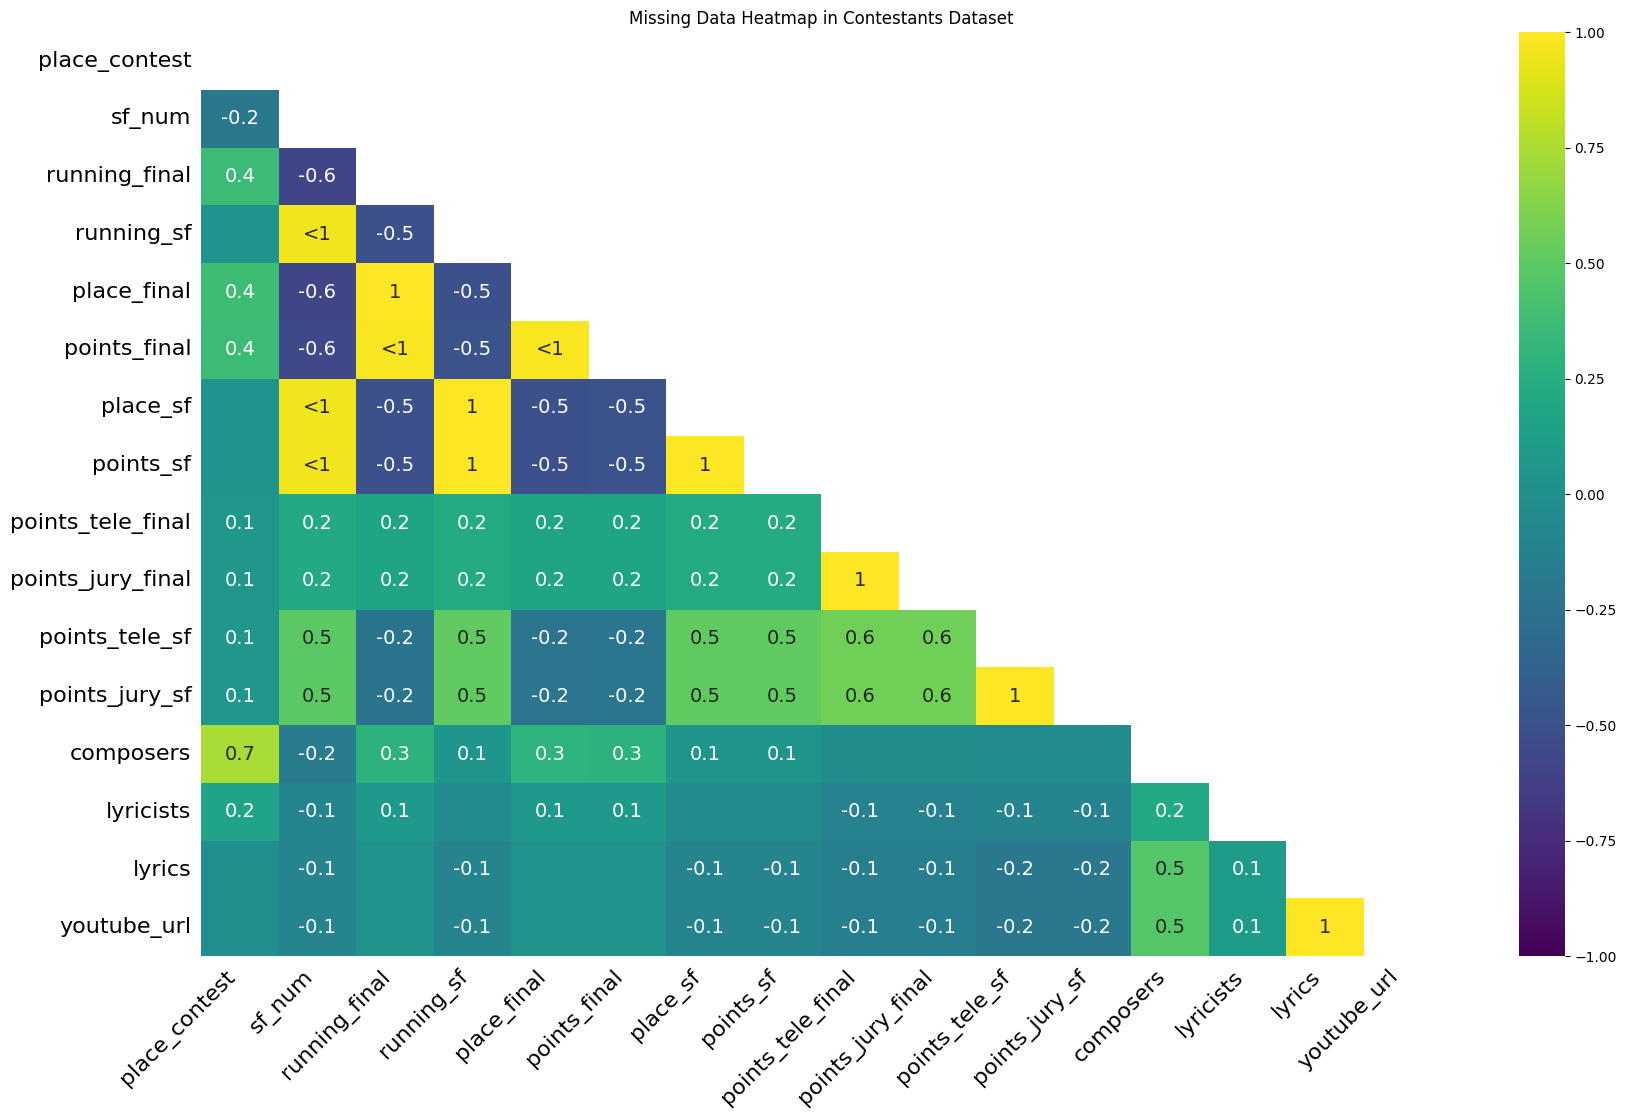

<Figure size 1000x600 with 0 Axes>

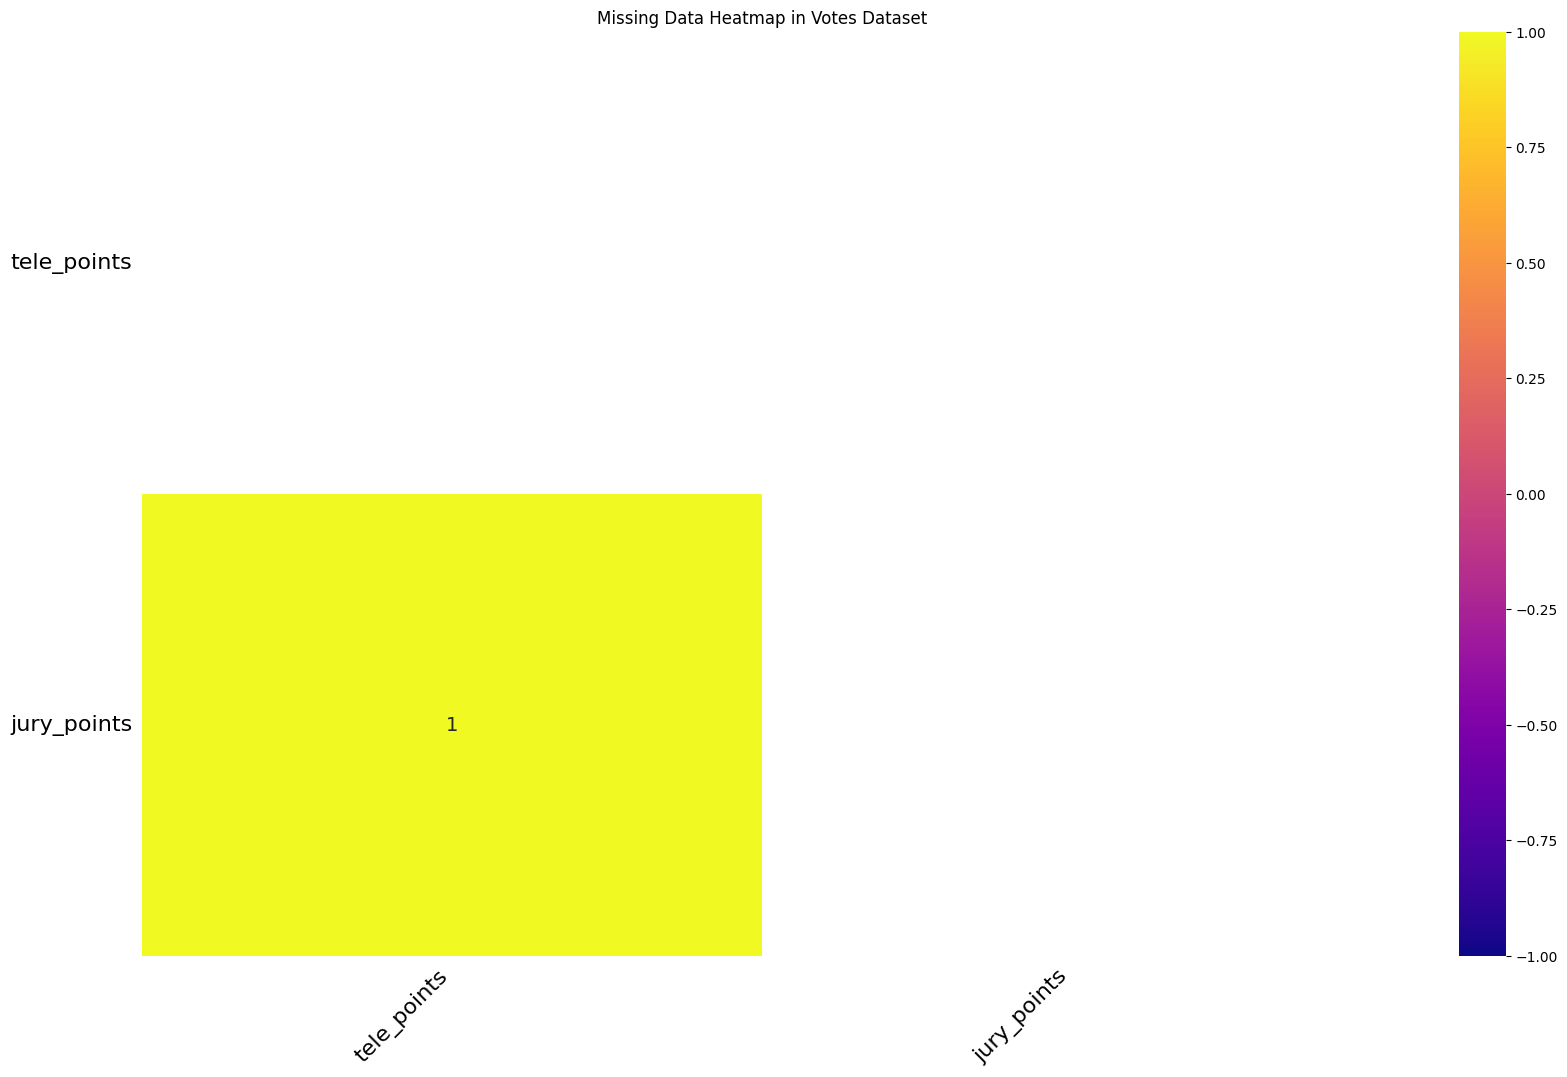

In [21]:
# Summary of missing data for both datasets
def display_missing_data_info(df, df_name):
    print(f"\nMissing data summary for {df_name}:")
    missing_data = df.isna().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
    print(missing_data)
    missing_percentage = (df.isna().mean() * 100).sort_values(ascending=False)
    print(f"\nPercentage of missing values in {df_name}:")
    print(missing_percentage)

# Display missing data info
display_missing_data_info(contestant_df, "Contestants Dataset")
display_missing_data_info(vote_df, "Votes Dataset")

# Visualize missing data with bar charts
plt.figure(figsize=(10, 6))
msno.bar(contestant_df, color='skyblue')
plt.title("Missing Data by Column in Contestants Dataset")
plt.show()

plt.figure(figsize=(10, 6))
msno.bar(vote_df, color='lightcoral')
plt.title("Missing Data by Column in Votes Dataset")
plt.show()

# Matrix plot for detailed pattern
plt.figure(figsize=(10, 6))
msno.matrix(contestant_df, sparkline=False)
plt.title("Missing Data Matrix in Contestants Dataset")
plt.show()

plt.figure(figsize=(10, 6))
msno.matrix(vote_df, sparkline=False)
plt.title("Missing Data Matrix in Votes Dataset")
plt.show()

# Heatmap for correlations in missing data
plt.figure(figsize=(10, 6))
msno.heatmap(contestant_df, cmap="viridis")
plt.title("Missing Data Heatmap in Contestants Dataset")
plt.show()

plt.figure(figsize=(10, 6))
msno.heatmap(vote_df, cmap="plasma")
plt.title("Missing Data Heatmap in Votes Dataset")
plt.show()


# Contestant Dataset

In [4]:
for i in range(len(contestant_df.columns)):
    column = contestant_df.columns[i]
    print(f'{column} : {np.sort(contestant_df[column].dropna().unique())}')
    print('--------------------------------------------------')


print(contestant_df.shape)
print(contestant_df.columns)
contestant_df.head()

year : [1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
--------------------------------------------------
to_country_id : ['Albania' 'Andorra' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Belarus' 'Belgium' 'Bosnia & Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'Georgia' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Latvia' 'Lithuania' 'Malta'
 'Moldova' 'Monaco' 'Montenegro' 'Netherlands' 'North Macedonia' 'Norway'
 'Poland' 'Portugal' 'Romania' 'Russia' 'San Marino' 'Serbia' 'Slovakia'
 'Slovenia' 'Sweden' 'Switzerland' 'Turkey' 'Ukraine' 'al' 'am' 'at' 'au'
 'az' 'ba' 'be' 'bg' 'by' 'ch' 'cs' 'cy' 'cz' 'de' 'dk' 'ee' 'es' 'fi'
 'fr' 'gb' '

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
0,1956,ch,Switzerland,Lys Assia,Refrain,2.0,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Georg Benz Stahl,NaN,"(Refrain d'amour...)\n\nRefrain, couleur du ci...",https://youtube.com/watch?v=IyqIPvOkiRk
1,1956,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cor Lemaire,Annie M. G. Schmidt,De vogels van Holland zijn zo muzikaal\nZe ler...,https://youtube.com/watch?v=u45UQVGRVPA
2,1956,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jacques Say;Jean Miret,Robert Montal,Messieurs les noyés de la Seine\nOuvrez-moi le...,https://youtube.com/watch?v=U9O3sqlyra0
3,1956,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,NaN,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Walter Andreas Schwarz,NaN,"Es gibt einen Hafen, da fährt kaum ein Schiff\...",https://youtube.com/watch?v=BDNARIDnmTc
4,1956,fr,France,Mathé Altéry,Le Temps Perdu,2.0,NaN,5.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,André Lodge,Rachèle Thoreau,"Chante, carillon\nLe chant du temps perdu\nCha...",https://youtube.com/watch?v=dm1L0XyikKI


In [5]:
contestant_df[contestant_df['year'] == 1956]

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
0,1956,ch,Switzerland,Lys Assia,Refrain,2.0,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Georg Benz Stahl,NaN,"(Refrain d'amour...)\n\nRefrain, couleur du ci...",https://youtube.com/watch?v=IyqIPvOkiRk
1,1956,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cor Lemaire,Annie M. G. Schmidt,De vogels van Holland zijn zo muzikaal\nZe ler...,https://youtube.com/watch?v=u45UQVGRVPA
2,1956,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jacques Say;Jean Miret,Robert Montal,Messieurs les noyés de la Seine\nOuvrez-moi le...,https://youtube.com/watch?v=U9O3sqlyra0
3,1956,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,NaN,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Walter Andreas Schwarz,NaN,"Es gibt einen Hafen, da fährt kaum ein Schiff\...",https://youtube.com/watch?v=BDNARIDnmTc
4,1956,fr,France,Mathé Altéry,Le Temps Perdu,2.0,NaN,5.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,André Lodge,Rachèle Thoreau,"Chante, carillon\nLe chant du temps perdu\nCha...",https://youtube.com/watch?v=dm1L0XyikKI
5,1956,lu,Luxembourg,Michèle Arnaud,Ne Crois Pas,2.0,NaN,13.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Christian Guitreau,NaN,Si on te dit qu't'a une belle gueule\nY a pas ...,https://youtube.com/watch?v=Pv7GJkqtNuc
6,1956,it,Italy,Franca Raimondi,Aprite Le Finestre,2.0,NaN,7.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Virgilio Panzuti,Pinchi,La prima rosa rossa è già sbocciata\nE nascon ...,https://youtube.com/watch?v=HHA1mC2RkKc
7,1956,nl,Netherlands,Corry Brokken,Voorgoed Voorbij,2.0,NaN,8.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jelle de Vries,NaN,Voorgoed voorbij\nNu zijn we nooit meer samen\...,https://youtube.com/watch?v=6OjNzLaifFM
8,1956,be,Belgium,Mony Marc,Le Plus Beau Jour De Ma Vie,2.0,NaN,10.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Claude Alix,David Bee,Les cloches sonnent\nTout carillonne\nLe plus ...,https://youtube.com/watch?v=dL139DezFwo
9,1956,de,Germany,Freddy Quinn,So Geht Das Jede Nacht,2.0,NaN,11.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Lothar Olias,Peter Mösser,"Am Sonntag mit Jimmy, am Montag mit Jack\nAm D...",https://youtube.com/watch?v=DJFGwPVKfyk


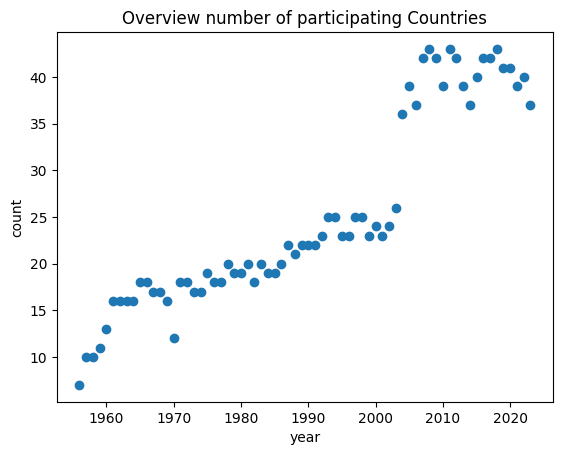

In [9]:

yearly_category_count = contestant_df.groupby('year')['to_country'].nunique().reset_index()
yearly_category_count.columns = ['year', 'count']

yearly_category_count

plt.figure()
plt.scatter(yearly_category_count['year'], yearly_category_count['count'],)
plt.xlabel('year')
plt.ylabel('count')
plt.title("Overview number of participating Countries")
plt.show()

# import plotly.express as px

# # Create a bar chart
# fig = px.bar(yearly_category_count, x='Year', y='Category_Count',
#              title='Number of Categories by Year',
#              labels={'Category_Count': 'Number of Categories', 'Year': 'Year'})

# fig.show()



In [7]:
yearly_category_count

,year,count
0,1956,7
1,1957,10
2,1958,10
3,1959,11
4,1960,13
...,...,...
63,2019,41
64,2020,41
65,2021,39
66,2022,40


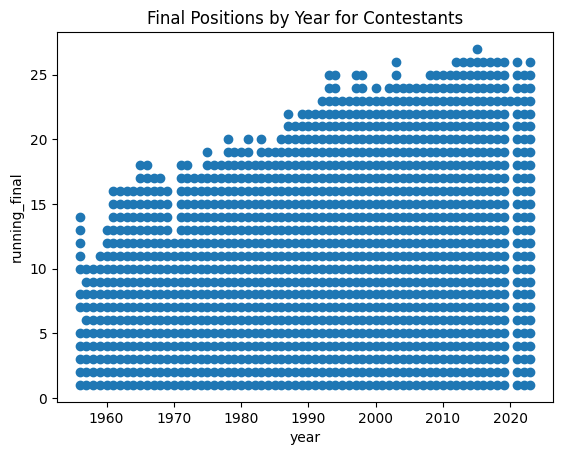

In [10]:
x_val = 'year'
y_val = 'running_final'

plt.figure()
plt.scatter(contestant_df[x_val], contestant_df[y_val],)
plt.xlabel(x_val)
plt.ylabel(y_val)
plt.title("Final Positions by Year for Contestants")

plt.show()

# Votes Dataset

In [11]:
print(vote_df.shape)
for i in range(len(vote_df.columns)):
    column = vote_df.columns[i]
    print(f'{column} : {np.sort(vote_df[column].dropna().unique())}')
    print('--------------------------------------------------')


vote_df.tail()

(51354, 9)
year : [1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2021 2022 2023]
--------------------------------------------------
round : ['final' 'semi-final' 'semi-final-1' 'semi-final-2']
--------------------------------------------------
from_country_id : ['ad' 'al' 'am' 'at' 'au' 'az' 'ba' 'be' 'bg' 'by' 'ch' 'cs' 'cy' 'cz'
 'de' 'dk' 'ee' 'es' 'fi' 'fr' 'gb' 'ge' 'gr' 'hr' 'hu' 'ie' 'il' 'is'
 'it' 'lt' 'lu' 'lv' 'ma' 'mc' 'md' 'me' 'mk' 'mt' 'nl' 'no' 'pl' 'pt'
 'ro' 'rs' 'ru' 'se' 'si' 'sk' 'sm' 'tr' 'ua' 'wld' 'yu']
--------------------------------------------------
to_country_id : ['ad' 'al' 'am' 'at' 'au' 'az' 'ba' 'be' 'bg' 'by' 'ch' 'cs' 'cy' 'cz'
 'de' 'dk' 'ee' 'es' 'fi' 'fr' 'gb' 'ge' 'gr' 'hr' 'hu' 

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
51349,2023,final,wld,al,wld,al,6,6.0,NaN
51350,2023,final,wld,pt,wld,pt,0,0.0,NaN
51351,2023,final,wld,rs,wld,rs,0,0.0,NaN
51352,2023,final,wld,gb,wld,gb,0,0.0,NaN
51353,2023,final,wld,de,wld,de,0,0.0,NaN


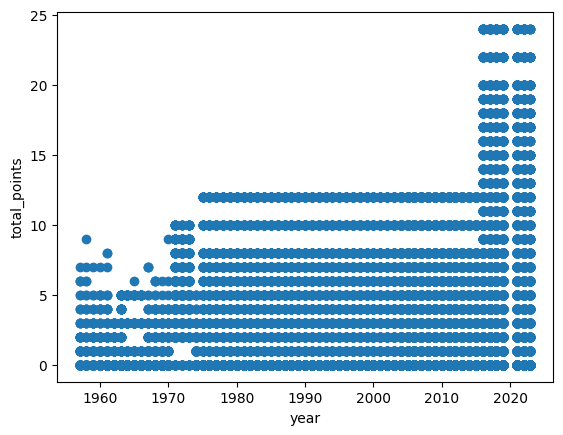

In [12]:
x_val = 'year'
y_val = 'total_points'

plt.figure()
plt.scatter(vote_df[x_val], vote_df[y_val],)
plt.xlabel(x_val)
plt.ylabel(y_val)
plt.title("Total Points by Year") 
plt.show()

In [13]:
vote_df[vote_df['year'] < 1980]

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,at,nl,6,NaN,NaN
1,1957,final,at,fr,at,fr,0,NaN,NaN
2,1957,final,at,dk,at,dk,0,NaN,NaN
3,1957,final,at,lu,at,lu,3,NaN,NaN
4,1957,final,at,de,at,de,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6131,1979,final,gb,it,gb,it,0,NaN,NaN
6132,1979,final,gb,mc,gb,mc,0,NaN,NaN
6133,1979,final,gb,se,gb,se,0,NaN,NaN
6134,1979,final,gb,be,gb,be,2,NaN,NaN


In [16]:
import pandas as pd

# Sample data
data = {
    'Voter': ['Voter1', 'Voter1', 'Voter2', 'Voter2', 'Voter3', 'Voter3'],
    'Subject': ['Subject1', 'Subject2', 'Subject1', 'Subject2', 'Subject1', 'Subject2'],
    'Score': [3, 5, 4, 1, 2, 4]
}
df = pd.DataFrame(data)

# Pivot the data to get a Voter-Subject matrix
pivot_df = df.pivot(index='Voter', columns='Subject', values='Score').fillna(0)
print(pivot_df)


Subject  Subject1  Subject2
Voter                      
Voter1          3         5
Voter2          4         1
Voter3          2         4


In [29]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px

# Sample data
data = {
    'Voter': ['Voter1', 'Voter1', 'Voter2', 'Voter2', 'Voter3', 'Voter3'],
    'Subject': ['Subject1', 'Subject2', 'Subject1', 'Subject2', 'Subject1', 'Subject2'],
    'Score': [3, 5, 4, 1, 2, 4]
}
df = pd.DataFrame(data)

# Pivot the data to get a Voter-Subject matrix
pivot_df = df.pivot(index='Voter', columns='Subject', values='Score').fillna(0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
pivot_df['Cluster'] = kmeans.fit_predict(pivot_df)

# Merge cluster labels with the original data
df = df.merge(pivot_df['Cluster'], on='Voter', how='left')

# Plot with marker size based on 'Score'
fig = px.scatter(df, x='Subject', y='Voter', color='Cluster', size='Score',
                 title="Clustering of Voters with Scores Represented by Marker Size",
                 labels={'Score': 'Score', 'Cluster': 'Cluster'},
                 size_max=20)  # size_max controls the maximum marker size

fig.show()


c:\Users\terra\Documents\UZH_doc\2024_2H\Interactive_Visual_Data_Analysis\IVDA_project\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [27]:
!pip install --upgrade nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.20.0-py3-none-any.whl (23 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
